Group members 5J\
K214594 Yousuf ahmed\
K213195 Sufiyaan Usmani\
K213203 Shahmir Raza

**Why use Graph Neural Networks?**\
GNNs are applied because a graph’s structure is irregular the node size, number of neighboring nodes, and features differ\
Other flavours of neural networks such as FNN, CNN, RNN
are not suited for handling data with complex relationships and interdependencies.\
GNNs utlizes a message passing mechanism, allowing nodes to communicate and aggregate information from thier neighbours.\
GNNs supports node classification, connection prediction and graph classification

**Other neural networks include**


1.   Convolutional Neural Networks
2.   Recurrent Neural Networks
3.   Generative Adversarial Neural Networks
4. FeedForward Neural Netwroks





---



**Research paper highlights** ever increase in chronic diseases due to inappropriate living habits, the impact of environment on mental health.
Development of AI has led to researches in predicting health outcomes.\
Chronic diseases such as diabetes, gastrointestinal disorder, eczema, asthma, autoimmune disease are emphasized as long term health conditions.

Research Paper has 5 sections:


1.   Introduction
2.   Deep learning based relationship prediction in recommendation systems
3. The proposed Multi context mining based graph neural network
4. Performance evaluation
5. Conclusions are drawn from this study



The Research paper Author
**proposes a multi-context mining-based graph
neural network for predicting emerging health risks.**\
The proposed method aims to determine the similarity relations
between chronic disease patients according to their behavioral patterns and mental health to predict the risks of chronic
disease patients who have similar features and increased
awareness of health care and prevention.\
Graph relationship representation would allow us to measure
potential risks in other users\
https://ieeexplore.ieee.org/document/10041148



---



Multi context mining based graph neural network are designed to identify connections between chronic diseases, mental health and behavioral patterns to prevent potential health risks.

The process involves three steps:
### 1.   Data preprocessing
To collect and preprocess health information, mental health information, and behavioral patterns information of chronic disease patients who suffer from high blood pressure, diabetes, and dyslipidemia.

### 2.   Multi context mining
Context mining was performed using
preprocessed data to generate a feature map for the graph
extension. In multivariate regression analysis, a regression
model that has high blood pressure, diabetes, and dyslipidemia as dependent variables were extracted. In addition,
in linear regression analysis, a regression model for mental
health and behavioral patterns was generated, and a feature
map was created. Through clustering, the nodes of the initial
graph were created. According to the correlation coefficients,
the edges of the initial graph were designed.
### 3. Graph representation
The last step was to augment the graph with the feature map generated through context mining of the initial graph and to update weights for predicting latent risks not only in relations between distant neighbors but in relations between close neighbors. In this way, it was possible to find similar symptoms and causes of all users and to predict emerging risks.




---



**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch
import torch.nn.functional as F

**Step 1:** Graph Augmentation Algorithm Based on Context Mining

In [ ]:
def create_prime_graph(adj_matrix):
    G_prime = nx.Graph()

    node = 1
    for v in range(len(adj_matrix)):
        if node <= 4:
            G_prime.add_node(f'C{node}')
            node += 1
        else:
            break

    for v in range(len(adj_matrix)):
        for e in range(len(adj_matrix[v])):
            if adj_matrix[v][e] == 1:
                G_prime.add_edge(f'C{v + 1}', f'C{e + 1}')

    return G_prime

Adjacency matrix resulted from coefficients of correlations between clusters

In [ ]:
adj_matrix = np.array([[0, 1, 1, 1], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 1, 0]])

Generation of Prime Graph (Base graph)

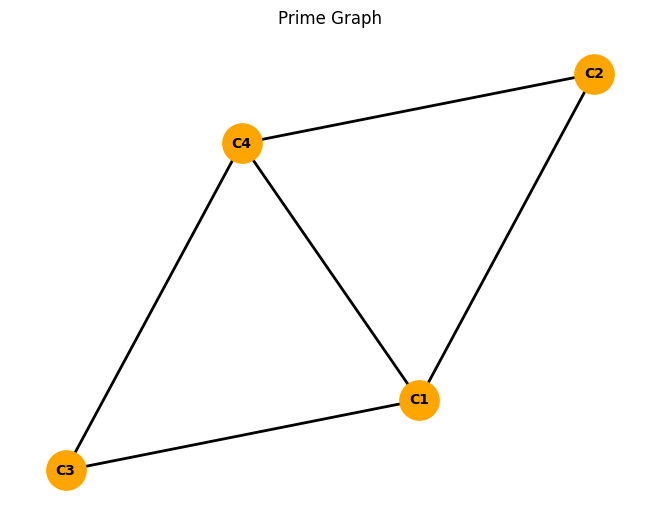

In [ ]:
V, E = adj_matrix.shape
prime_graph = create_prime_graph(adj_matrix)


pos = nx.spring_layout(prime_graph)
nx.draw(prime_graph, pos, with_labels=True, font_weight='bold', node_color='orange', node_size=800, font_size=10, width=2)
plt.title("Prime Graph")
plt.show()

**Step 2:** Graph augmentation using graph convolution

In [ ]:
np.random.seed(42)
User_data = np.random.uniform(-3, 3, size=(30, 4))
print(User_data)

[[-0.75275929  2.70428584  1.39196365  0.59195091]
 [-2.06388816 -2.06403288 -2.65149833  2.19705687]
 [ 0.60669007  1.24843547 -2.87649303  2.81945911]
 [ 1.99465584 -1.72596534 -1.9090502  -1.89957294]
 [-1.17454654  0.14853859 -0.40832989 -1.25262516]
 [ 0.67111737 -2.16303684 -1.24713211 -0.80182894]
 [-0.26358009  1.71105577 -1.80195731  0.08540663]
 [ 0.55448741 -2.72129752  0.64526911 -1.97685526]
 [-2.60969044  2.69331322  2.7937922   1.85038409]
 [-1.17231738 -2.41396732  1.10539816 -0.35908504]
 [-2.26777059 -0.02893854 -2.79366887  2.45592241]
 [-1.44732011  0.97513371 -1.12973354  0.12040813]
 [ 0.28026168 -1.89087327  2.81750777  1.65079694]
 [ 2.63699365  2.3689641   0.58739987  2.53124541]
 [-2.46904499 -1.82410283 -2.72863627 -1.04801802]
 [-0.66793626 -1.37190581  1.97242505 -0.85948004]
 [-1.31439294  0.2561765  -2.15445465  1.81318188]
 [-2.55269614  2.92132162  1.63346862 -1.80770591]
 [-2.9668673   1.89276857  1.24114406  1.37404301]
 [ 1.62762208 -2.55573209 -0.84

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class GraphConvolutionLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GraphConvolutionLayer, self).__init__()
        self.weight = nn.Parameter(torch.FloatTensor(input_dim, output_dim))
        nn.init.xavier_uniform_(self.weight)

    def forward(self, adjacency_matrix, input_matrix):
        support = torch.mm(input_matrix, self.weight)
        output_matrix = torch.mm(adjacency_matrix, support)
        return output_matrix

def graph_augmentation(user_matrix, adjacency_matrix, k):
    input_dim = user_matrix.size(1)
    hidden_dim = 64
    output_dim = user_matrix.size(1)

    gcn_layer1 = GraphConvolutionLayer(input_dim, hidden_dim)
    gcn_layer2 = GraphConvolutionLayer(hidden_dim, output_dim)

    h1 = F.relu(gcn_layer1(adjacency_matrix, user_matrix))

    h2 = gcn_layer2(adjacency_matrix, h1)

    weight = torch.sigmoid(torch.mm(torch.mm(user_matrix.pow(k), adjacency_matrix.t()), h2.pow(k)))

    augmented_adjacency = adjacency_matrix * weight

    return augmented_adjacency

feature_map = torch.rand((4, 4))
adjacency_matrix = torch.tensor(adj_matrix, dtype=torch.float32)
k = 2

augmented_adjacency = graph_augmentation(feature_map, adjacency_matrix, k)

print("Augmented Adjacency graph:")
print(augmented_adjacency)

Augmented Adjacency graph:
tensor([[0.0000, 0.5906, 0.6419, 0.5344],
        [0.9997, 0.0000, 0.0000, 0.6249],
        [1.0000, 0.0000, 0.0000, 0.6820],
        [0.9630, 0.6407, 0.7154, 0.0000]], grad_fn=<MulBackward0>)


In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.2 MB/s eta 0:00:00


The Research paper proposed algorithm scope revolved around until the above mentioned algorithm\
Afterwards the research paper focuses on using the Fully connected layers

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import networkx as nx
import matplotlib.pyplot as plt
import random

def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

def graph_convolution(user_matrix, adj_matrix):
    num_users = len(user_matrix)
    num_features = len(user_matrix[0])
    num_nodes = num_users + len(adj_matrix)

    G = nx.Graph()

    for i in range(num_users):
        G.add_node(i, label='User', features=user_matrix[i])

    for j in range(len(adj_matrix)):
        G.add_node(j + num_users, label='Adjacency', features=adj_matrix[j])

    edge_index = []
    for i in range(num_users):
        for j in range(len(adj_matrix)):
            edge_index.append((i, j + num_users))
            edge_index.append((j + num_users, i))

    x = torch.cat([torch.tensor(user_matrix), torch.tensor(adj_matrix)], dim=0).float()
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.ones(edge_index.size(1), 1)
    y = torch.zeros(num_users + len(adj_matrix), dtype=torch.long)

    neighbouring_edges = [(random.randint(0, num_users - 1), random.randint(num_users, num_nodes - 1)) for _ in range(100)]
    edge_index_arbitrary = torch.tensor(neighbouring_edges, dtype=torch.long).t().contiguous()

    for edge in neighbouring_edges:
        G.add_edge(edge[0], edge[1])

    data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)

    class GCN(nn.Module):
        def __init__(self, in_channels, out_channels):
            super(GCN, self).__init__()
            self.conv1 = GCNConv(in_channels, 16)
            self.conv2 = GCNConv(16, out_channels)

        def forward(self, x, edge_index):
            x = self.conv1(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, training=self.training)
            x = self.conv2(x, edge_index)
            return F.log_softmax(x, dim=1)

    model = GCN(in_channels=num_features, out_channels=2)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

    for epoch in range(201):
        optimizer.zero_grad()
        z = model(x, edge_index)
        loss = F.nll_loss(z[:num_users], data.y[:num_users])
        acc = accuracy(z.argmax(dim=1), data.y)
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    plt.show()

In [ ]:
adj_matrix = [[0, 1, 1, 1],
              [1, 0, 0, 1],
              [1, 0, 0, 1],
              [1, 1, 1, 0]]

Epoch   0 | Loss: 0.78 | Acc: 0.00%
Epoch  10 | Loss: 0.51 | Acc: 100.00%
Epoch  20 | Loss: 0.33 | Acc: 100.00%
Epoch  30 | Loss: 0.17 | Acc: 100.00%
Epoch  40 | Loss: 0.06 | Acc: 100.00%
Epoch  50 | Loss: 0.01 | Acc: 100.00%
Epoch  60 | Loss: 0.02 | Acc: 100.00%
Epoch  70 | Loss: 0.01 | Acc: 100.00%
Epoch  80 | Loss: 0.00 | Acc: 100.00%
Epoch  90 | Loss: 0.00 | Acc: 100.00%
Epoch 100 | Loss: 0.00 | Acc: 100.00%
Epoch 110 | Loss: 0.01 | Acc: 100.00%
Epoch 120 | Loss: 0.00 | Acc: 100.00%
Epoch 130 | Loss: 0.00 | Acc: 100.00%
Epoch 140 | Loss: 0.00 | Acc: 100.00%
Epoch 150 | Loss: 0.00 | Acc: 100.00%
Epoch 160 | Loss: 0.00 | Acc: 100.00%
Epoch 170 | Loss: 0.00 | Acc: 100.00%
Epoch 180 | Loss: 0.00 | Acc: 100.00%
Epoch 190 | Loss: 0.00 | Acc: 100.00%
Epoch 200 | Loss: 0.00 | Acc: 100.00%


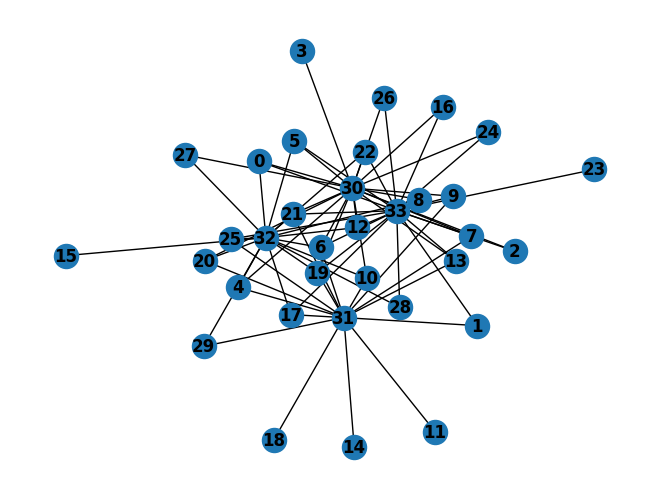

In [ ]:
user_matrix = []

for i in range(30):
  temp = []
  for j in range(4):
    random_number = round(random.uniform(-3, 3), 2)
    temp.append(random_number)
  user_matrix.append(temp)


graph_convolution(user_matrix, adj_matrix)